# Part I - Exploration of the prosperLoanData 
## by Sadura Priscilla

## Introduction
> Introduce the dataset

>**Rubric Tip**: Your code should not generate any errors, and should use functions, loops where possible to reduce repetitive code. Prefer to use functions to reuse code statements.

> **Rubric Tip**: Document your approach and findings in markdown cells. Use comments and docstrings in code cells to document the code functionality.

>**Rubric Tip**: Markup cells should have headers and text that organize your thoughts, findings, and what you plan on investigating next.  



## Preliminary Wrangling


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
prosperLD = pd.read_csv('prosperLoanData.csv')
prosperLD.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,09:29.3,C,36,Completed,14/08/2009 0:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,28:07.9,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,00:47.1,HR,36,Completed,17/12/2009 0:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,02:35.0,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,38:39.1,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


In [3]:
print(prosperLD.shape)
print(prosperLD.dtypes)
print(prosperLD.head(10))

(113937, 81)
ListingKey                      object
ListingNumber                    int64
ListingCreationDate             object
CreditGrade                     object
Term                             int64
                                ...   
PercentFunded                  float64
Recommendations                  int64
InvestmentFromFriendsCount       int64
InvestmentFromFriendsAmount    float64
Investors                        int64
Length: 81, dtype: object
                ListingKey  ListingNumber ListingCreationDate CreditGrade  \
0  1021339766868145413AB3B         193129             09:29.3           C   
1  10273602499503308B223C1        1209647             28:07.9         NaN   
2  0EE9337825851032864889A          81716             00:47.1          HR   
3  0EF5356002482715299901A         658116             02:35.0         NaN   
4  0F023589499656230C5E3E2         909464             38:39.1         NaN   
5  0F05359734824199381F61D        1074836             26:37.1         

In [4]:
prosperLD.describe().T[:5]

,count,mean,std,min,25%,50%,75%,max
ListingNumber,113937.0,627885.692506,328076.236386,4.00000,400919.00000,600554.00000,892634.00000,1.255725e+06
Term,113937.0,40.830248,10.436212,12.00000,36.00000,36.00000,36.00000,6.000000e+01
BorrowerAPR,113912.0,0.218828,0.080364,0.00653,0.15629,0.20976,0.28381,5.122900e-01
BorrowerRate,113937.0,0.192764,0.074818,0.00000,0.13400,0.18400,0.25000,4.975000e-01
LenderYield,113937.0,0.182701,0.074516,-0.01000,0.12420,0.17300,0.24000,4.925000e-01


In [186]:
import warnings
warnings.filterwarnings('ignore')

### **Data Structure**
> The Prosper Loan Dataset has 113937 rows and 81 columns. 

**Feature of interest**
> The main feature of interest is the LoanStatus. The unique entries in the LoanStatus columns are: 'Completed', 'Cancelled', 'Current', 'Defaulted', 'Past Due (1-15 days)', 'Past Due (16-30 days)', 'Past Due (31-60 days)', 'Past Due (61-90 days)', 'Past Due (91-120 days)', 'Past Due (>120 days)', 'FinalPaymentInProgress', and 'Chargedoff'. 
My interest is to find out the variables that are important to predicting LoanStatus.

**Supporting features of interest**
> I will look at the relationship of some variables to LoanStatus, I will drop some features and concentrate on exploring certain features to provide answers to some questions.

> Some features of interest are LoanTerm, BorrowerAPR, CreditScoreRange, DebtToIncomeRatio, AvailableBankcardCredit

In [187]:
df = prosperLD.copy()
df = df.drop(columns = ['ListingKey', 'ListingNumber', 'ClosedDate', 'LenderYield','EstimatedEffectiveYield','EstimatedLoss',
                          'ProsperRating (numeric)', 'ProsperRating (Alpha)','CurrentlyInGroup','GroupKey','DateCreditPulled',
                          'FirstRecordedCreditLine','OpenCreditLines','TotalCreditLinespast7years','OpenRevolvingAccounts',
                          'OpenRevolvingMonthlyPayment','InquiriesLast6Months','TotalInquiries','DelinquenciesLast7Years',
                          'PublicRecordsLast10Years','PublicRecordsLast12Months','TotalTrades',
                          'TradesOpenedLast6Months','IncomeRange','IncomeVerifiable','LoanKey','TotalProsperPaymentsBilled',
                          'ProsperPaymentsLessThanOneMonthLate','ProsperPaymentsOneMonthPlusLate','ProsperPrincipalBorrowed',
                          'ProsperPrincipalOutstanding','ScorexChangeAtTimeOfListing','LoanFirstDefaultedCycleNumber','LoanNumber',
                          'LoanOriginationDate','LoanOriginationQuarter','MemberKey','LP_CustomerPayments','LP_CustomerPrincipalPayments',
                          'LP_InterestandFees','LP_ServiceFees','LP_CollectionFees','LP_GrossPrincipalLoss',
                          'LP_NonPrincipalRecoverypayments'], axis = 1)

In [188]:
df.duplicated().sum()

0

In [189]:
df.isna().sum()

ListingCreationDate                       0
CreditGrade                           84984
Term                                      0
LoanStatus                                0
BorrowerAPR                              25
BorrowerRate                              0
EstimatedReturn                       29084
ProsperScore                          29084
ListingCategory (numeric)                 0
BorrowerState                          5515
Occupation                             3588
EmploymentStatus                       2255
EmploymentStatusDuration               7625
IsBorrowerHomeowner                       0
CreditScoreRangeLower                   591
CreditScoreRangeUpper                   591
CurrentCreditLines                     7604
CurrentDelinquencies                    697
AmountDelinquent                       7622
RevolvingCreditBalance                 7604
BankcardUtilization                    7604
AvailableBankcardCredit                7544
TradesNeverDelinquent (percentag

### Univariate Exploration

> In this section, we will investigate the distributions of individual variables. We will also clean up some outliers to enable us view the relationships between variables.


> **Rubric Tip**: The project (Parts I alone) should have at least 15 visualizations distributed over univariate, bivariate, and multivariate plots to explore many relationships in the data set.  Use reasoning to justify the flow of the exploration.



>**Rubric Tip**: Use the "Question-Visualization-Observations" framework  throughout the exploration. This framework involves **asking a question from the data, creating a visualization to find answers, and then recording observations after each visualisation.** 




>**Rubric Tip**: Visualizations should depict the data appropriately so that the plots are easily interpretable. You should choose an appropriate plot type, data encodings, and formatting as needed. The formatting may include setting/adding the title, labels, legend, and comments. Also, do not overplot or incorrectly plot ordinal data.

In [190]:
# Set the font dictionaries (for plot title and axis titles)
title_font = {'fontname':'Arial', 'size':'14', 'color':'black', 'weight':'normal',
              'verticalalignment':'bottom'} # Bottom vertical alignment for more space
axis_font = {'fontname':'Arial', 'size':'12'}

In [191]:
# set a title and axis label function
def plotter(str1, str2, str3):
    plt.title(str1, **title_font)
    plt.ylabel(str2, **axis_font)
    plt.xlabel(str3, **axis_font);


### Exploration of the Loan Status

**Question**
> What is the spread of the Loan Status column

**Visualizations**

In [192]:
# to order the loan status categories
LoanStatusOrder = ['Completed','Cancelled', 'Current', 'FinalPaymentInProgress','Defaulted','Past Due (1-15 days)',
        'Past Due (16-30 days)','Past Due (31-60 days)', 'Past Due (61-90 days)',
       'Past Due (91-120 days)', 'Past Due (>120 days)' ,'Chargedoff']
Status = pd.api.types.CategoricalDtype(ordered=True, categories=LoanStatusOrder)
df['LoanStatus'] = df['LoanStatus'].astype(Status);

In [193]:
color = sb.color_palette()[0]

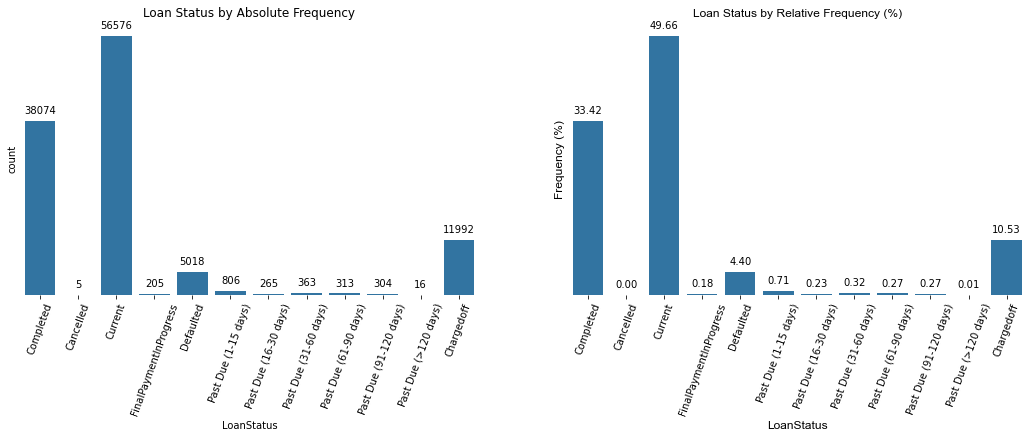

In [194]:
fig,axes = plt.subplots(1,2,  figsize=(18,5))

#plotting first graph
plotter ('Loan Status by Absolute Frequency', 'Frequency', '')
plot1 = sb.countplot(ax=axes[0],data = df, x = 'LoanStatus', color = color)
for p in plot1.patches:
    plot1.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

#set labels

plt.xticks(rotation = 70)
axes[0].set_title('Loan Status by Absolute Frequency')
labels = ['Completed','Cancelled', 'Current', 'FinalPaymentInProgress', 'Defaulted','Past Due (1-15 days)',
        'Past Due (16-30 days)','Past Due (31-60 days)', 'Past Due (61-90 days)',
       'Past Due (91-120 days)', 'Past Due (>120 days)', 'Chargedoff']
axes[0].set_xticklabels(labels, rotation = 70)
axes[0].set_yticks(ticks=[])
axes[0].set_yticklabels(labels ='Frequency')

#removing plot box and axis labels
plot1.spines['top'].set_visible(False)
plot1.spines['right'].set_visible(False)
plot1.spines['bottom'].set_visible(False)
plot1.spines['left'].set_visible(False);


#For the Second plot

#find percentages
loanstat = df.LoanStatus.value_counts(sort = False, normalize=True).reset_index().rename({'index':'LoanStatus','LoanStatus':'Frequency (%)'}, axis=1)
loanstat['Frequency (%)'] = loanstat['Frequency (%)']*100

#plotting second graph
ax2 = sb.barplot(ax=axes[1],x='LoanStatus', y='Frequency (%)', data=loanstat, color = color)

#annotating
for p in ax2.patches:
    ax2.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

plt.xticks(rotation = 70)
#plt.yticks(ticks=[])
axes[1].set_title('Loan Status by Relative Frequency (%)')
axes[1].set_yticks(ticks=[])
axes[1].set_yticklabels(labels ='Frequency (%)')

#removing plot box and axis labels
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.spines['bottom'].set_visible(False)
ax2.spines['left'].set_visible(False);

#plotter('Loan Status by Relative Frequency (%)','Frequency (%)','Loan Status')


**Observation on Loan Status**

> Of the 113937 Loan records, About half of the records (49.66%) fall in the Current Loan Status category, another 33.42% of the records have completely repaid their loan, there are also about 10.53% Loan records that fall into the Chargedoff category. These sum up to 93.61 percent of the Loan records. The Cancelled, Defaulted, Past Due and FinalPaymentInProgress categories form the remaining 6.39% of the records. 

### Exploration of the Loan Term

**Question**
> What is the spread of the Loan Term column

**Visualizations**

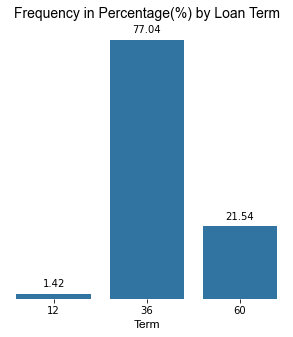

In [195]:

plt.figure(figsize = [5,5])

# creat var to hold value_counts and find percentages
dat = df.Term.value_counts(sort = False, normalize = True).reset_index().rename({'index':'Term','Term':'percent'}, axis=1)
dat['percent'] = dat['percent']*100

#plotting
ax = sb.barplot(data = dat, x = 'Term', y = 'percent', color = color)

#annotating
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

#removing plot box and axis labels
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
plt.yticks(ticks=[])
plotter('Frequency in Percentage(%) by Loan Term', '', 'Term');

**Observation on Loan Term**

> Term is the length of the loan expressed in months. More than 2/3 of the records (77.01%) fall in the 36 months repayment term category, while another 21.54% fall in the 60 months repayment term category. A small percentage which is the remaining 1.42% fall into the 12 months repayment term category.

### Exploration of the Loan Borrower's APR

APR is the annual cost of a loan to a borrower — including fees. The APR is expressed as a percentage. APR or annual percentage rate, provides a clearer picture of your loan’s true cost because it reflects your loan’s annual interest rate including all fees to originate the loan. Often affected by Your loan amount, The length of the loan, Interest rate, Origination fee.

**Question**
> What is the spread of the BorrowerAPR. 

To answer the question of What affects the borrower’s APR or interest rate, I need to explore the BorrowerAPR. 

**Visualization**

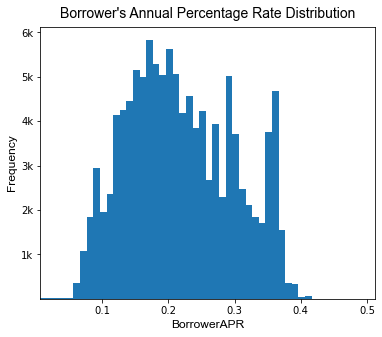

In [196]:
plt.figure(figsize = [6,5])
bins= np.arange(df.BorrowerAPR.min(), df.BorrowerAPR.max()+0.01, 0.01)
df.BorrowerAPR.hist(grid = False,bins = bins)
plt.xlim(df.BorrowerAPR.min(), df.BorrowerAPR.max())
plt.yticks([1000, 2000, 3000, 4000, 5000,6000], ['1k', '2k', '3k','4k', '5k','6k'])
plotter("Borrower's Annual Percentage Rate Distribution", 'Frequency', 'BorrowerAPR')

In [197]:
df.BorrowerAPR.max()

0.51229

**Observation on BorrowerAPR**
> The BorrowerAPR is spread between 0 and about 51 percent. Majority of the borrowers fall between 6% and 40% APR rate.


### Exploration of the CreditScoreRangeUpper column

**Question**
> What is the CreditScoreRangeUpper column

**Visualizations**

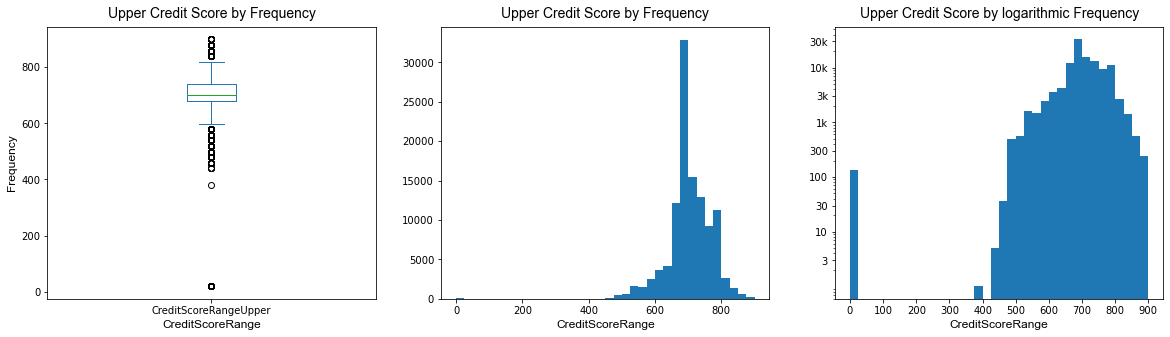

In [198]:
#view the Upper Credit Score in different scales
plt.figure(figsize = [20,5])
# first plot
plt.subplot(1,3,1)
df.CreditScoreRangeUpper.plot.box(grid = False)
plotter("Upper Credit Score by Frequency", 'Frequency', 'CreditScoreRange');

# second plot 
plt.subplot(1,3,2)
bins = np.arange(0, df.CreditScoreRangeUpper.max()+25, 25)
df.CreditScoreRangeUpper.hist(grid = False, bins = bins)
plotter("Upper Credit Score by Frequency", '', 'CreditScoreRange');

#third plot
plt.subplot(1,3,3)
df.CreditScoreRangeUpper.hist(grid = False, bins = bins)
plt.yscale('log')
plt.xticks([0,100, 200, 300,400, 500,600,700,800, 900], [0,100, 200, 300,400, 500,600,700,800, 900])
plt.yticks([3,10, 30,100,300, 1000,3000,10000, 30000], [3,10, 30,100, 300,'1k','3k','10k', '30k'])
plotter("Upper Credit Score by logarithmic Frequency", '', 'CreditScoreRange');

**Observations on Upper Credit Score Range**

> The Upper Credit Score is a left skewed unimodal distribution, with a modal credit score of about 700.

> By eyeballing the plots, there are **outliers** which need to be removed.

In [199]:
# Since there are more spread of the lower outliers,  we select low outliers using criteria eyeballed from the plots

low_outliers = (df['CreditScoreRangeUpper'] < 400)

print(low_outliers.sum())
print(df.loc[low_outliers,:])

134
       ListingCreationDate CreditGrade  Term  LoanStatus  BorrowerAPR  \
794                40:55.5          NC    36   Completed      0.29776   
912                23:08.4          NC    36   Defaulted      0.27276   
1685               50:46.7          NC    36  Chargedoff      0.18065   
4290               19:41.0          NC    36  Chargedoff      0.24502   
4371               45:59.7          NC    36   Defaulted      0.24505   
...                    ...         ...   ...         ...          ...   
109855             07:35.5          NC    36   Completed      0.22643   
110290             22:12.6          NC    36  Chargedoff      0.17752   
111624             33:39.0          NC    36   Defaulted      0.29776   
113714             26:07.6          HR    36  Chargedoff      0.28887   
113848             04:40.6          NC    36   Completed      0.30709   

        BorrowerRate  EstimatedReturn  ProsperScore  \
794           0.2900              NaN           NaN   
912      

**Observations cont'd**

> There are 134 records with less than 400 Upper Credit Score Range. Since these qualify as outliers, we will remove these from the data.

**Outlier Removals and Visualization Plots**

In [200]:
# remove points with low_outliers.
df = df.loc[-low_outliers, :]

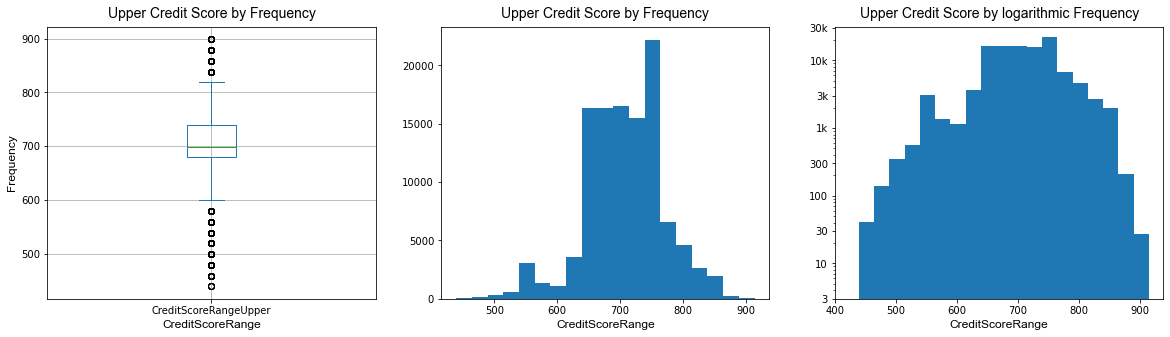

In [201]:
#Replot the Upper Credit Score in different scales
plt.figure(figsize = [20,5])
# first plot
plt.subplot(1,3,1)
df.CreditScoreRangeUpper.plot.box(grid = True)
plotter("Upper Credit Score by Frequency", 'Frequency', 'CreditScoreRange');

# second plot 
plt.subplot(1,3,2)
bins = np.arange(df.CreditScoreRangeUpper.min(), df.CreditScoreRangeUpper.max()+25, 25)
df.CreditScoreRangeUpper.hist(grid = False, bins = bins)
plotter("Upper Credit Score by Frequency", '', 'CreditScoreRange');

#third plot
plt.subplot(1,3,3)
df.CreditScoreRangeUpper.hist(grid = False, bins = bins)

plt.yscale('log')

plt.xticks([400, 500,600,700,800, 900], [400, 500,600,700,800, 900])
plt.yticks([3,10, 30,100,300, 1000,3000,10000, 30000], [3,10, 30,100, 300,'1k','3k','10k', '30k'])
plotter("Upper Credit Score by logarithmic Frequency", '', 'CreditScoreRange');

**Observations cont'd**

> As shown in the plots, the median Upper Credit score is 700 while the modal credit score is about 750. Also, about 50 percent of the distribution have between 670 and 740 Upper Credit Score.

> Furthermore, although there are data points that are shown as outliers in the boxplot, they may be valid data points and therefore wont be removed becaause they are close to the other data points. 

### Exploration of the DebtToIncomeRatio
The debt-to-income ratio (DTI) compares how much a borrower owe each month to how much he earns.

This column shows the debt to income ratio of the borrower at the time the credit profile was pulled. This value is Null if the debt to income ratio is not available. This value is capped at 10.01 (any debt to income ratio larger than 1000% will be returned as 1001%).

**Question**
> What is the distribution of the DebtToIncomeRatio column

**Visualization**

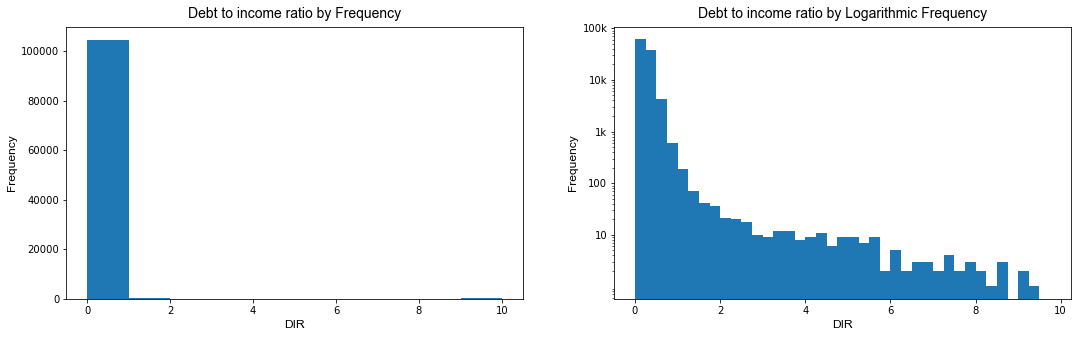

In [202]:
plt.figure(figsize = [18,5])
plt.subplot(1, 2, 1) 
plt.hist(df.DebtToIncomeRatio)
plotter("Debt to income ratio by Frequency", 'Frequency', 'DIR')
#plt.yticks([20000, 40000,60000,80000, 100000], [10,100,'1k','10k', '100k'])


plt.subplot(1, 2, 2) 
bins = np.arange(0,10+0., 0.25 )
df.DebtToIncomeRatio.hist(grid = False, bins = bins)
plt.yscale('log')
plt.yticks([10,100, 1000,10000, 100000], [10,100,'1k','10k', '100k'])
plotter("Debt to income ratio by Logarithmic Frequency", 'Frequency', 'DIR');

**Observation on Debt to Income Ratio**
> The Debt to income ratio column is right skew. The modal Income ratio is between 0 and 1, and more than 95 percent of the data fall in this category.

### Exploration of the AvailableBankCredit
The Available bank credit is the total available credit via bank card at the time the credit profile was pulled.

**Question**
> What is the distribution of the AvailableBankCredit column

**Visualization**

0.0        0.045859
500.0      0.002848
300.0      0.001419
1000.0     0.001363
2000.0     0.001260
             ...   
23067.0    0.000009
70401.0    0.000009
20374.0    0.000009
60444.0    0.000009
34415.0    0.000009
Name: AvailableBankcardCredit, Length: 31829, dtype: float64


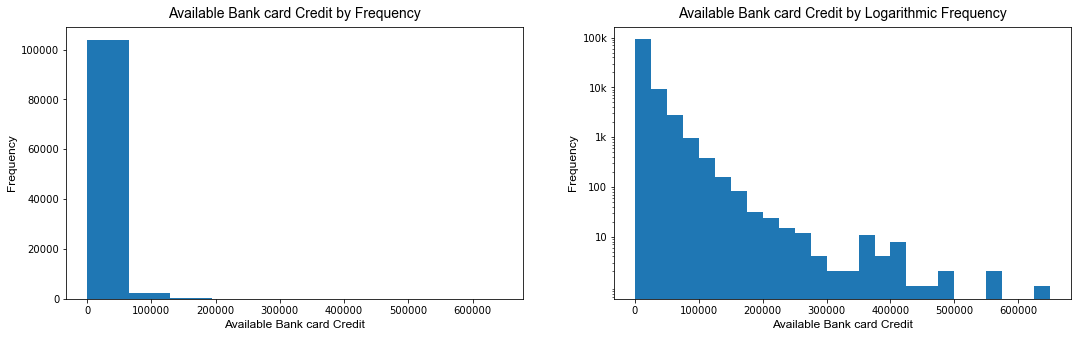

In [203]:
from locale import normalize
from matplotlib.colors import Normalize


plt.figure(figsize = [18,5])
plt.subplot(1, 2, 1)
df.AvailableBankcardCredit.hist(grid = False)
plotter("Available Bank card Credit by Frequency", 'Frequency', 'Available Bank card Credit');

plt.subplot(1, 2, 2) 
bins = np.arange(0,df.AvailableBankcardCredit.max()+25000, 25000 )
df.AvailableBankcardCredit.hist(grid = False, bins = bins)
plt.yscale('log')
plt.yticks([10,100, 1000,10000, 100000], [10,100,'1k','10k', '100k'])
plotter("Available Bank card Credit by Logarithmic Frequency", 'Frequency', 'Available Bank card Credit');
print(df.AvailableBankcardCredit.value_counts(sort = True, normalize=True))

**More Visualizations on the Available Bank card Credit

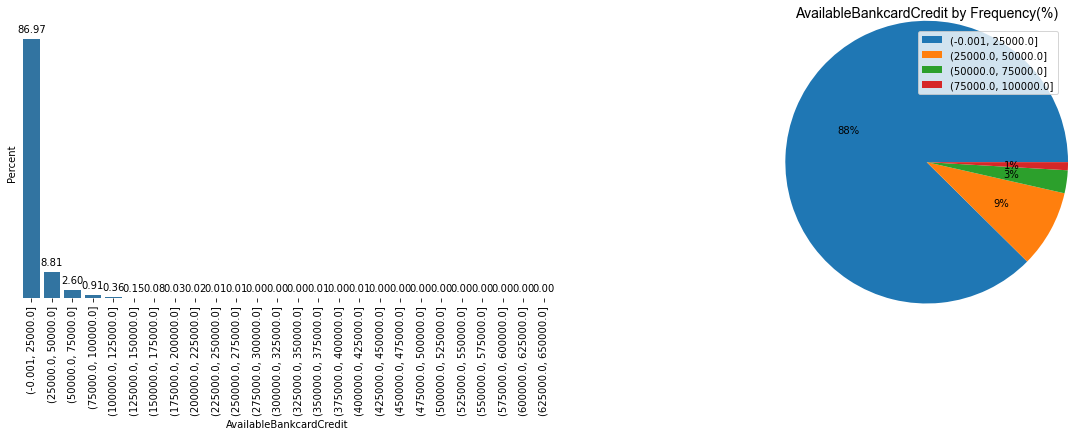

In [204]:
# Set a number of bins into which the data will be grouped.
# Set bin edges, and compute center of each bin

bin_edges = np.arange(0,df.AvailableBankcardCredit.max()+25000, 25000)
bin_centers = bin_edges[:-1] + 12500

# Cut the bin values into discrete intervals and plot.
credit_binned = pd.cut(df['AvailableBankcardCredit'], bin_edges, include_lowest = True).value_counts(normalize = True).reset_index().rename({'index':'AvailableBankcardCredit','AvailableBankcardCredit':'Percent'}, axis=1)

credit_binned['Percent'] = credit_binned['Percent']*100
credit_binned_reduced = credit_binned[credit_binned['Percent']>0.5]
fig, (ax1, ax2) = plt.subplots(1,2, figsize = [21,5])

#plot 1
ax1 = sb.barplot(ax = ax1, data = credit_binned, x = 'AvailableBankcardCredit', y = 'Percent', color = color)
ax1.tick_params(labelrotation=90)
#annotating
for p in ax1.patches:
    ax1.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['bottom'].set_visible(False)
ax1.spines['left'].set_visible(False)
ax1.set_yticks([])

plotter('AvailableBankcardCredit by Frequency(%)', '', '');

#plot 2
#plt.subplot(1,2,2)
label = credit_binned_reduced['AvailableBankcardCredit']
ax2 = credit_binned_reduced.plot.pie(ax = ax2, y = 'Percent', autopct='%.0f%%', radius=1.3, labels = None)
plt.legend(label, loc = 'upper right')
plotter('AvailableBankcardCredit by Frequency(%)', '', '');

**Observation on Available Bank Card Credit**
>About 87% of the borrowers have between the range of 0 and 25000 available bank card credit. About 9% borrowers have between 25000 and 50000 available bank card credit. Only less 5% have above 50000 bank credit

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

**Observation on Loan Status**

> The Loan Status distribution has three peaks. About half of the records (49.66%) fall in the Current Loan Status category, another 33.42% of the records have completely repaid their loan, there are also about 10.53% Loan records that fall into the Chargedoff category. These sum up to 93.61 percent of the Loan records. The Cancelled, Defaulted, Past Due and FinalPaymentInProgress categories form the remaining 6.39% of the records. 

**Observation on Loan Term**

> The Loan Term is a unimodal distribution. More than 2/3 of the records fall in the 36 months repayment term category, while another 21.54% fall in the 60 months repayment term category. A small percentage which is the remaining 1.42% fall into the 12 months repayment term category.

**Observation on BorrowerAPR**
> This distribution is a right- skewed, multimodal distribution with three peaks around 17%, 30%, and 35%. The BorrowerAPR is spread between 0 and about 51 percent. The highest occuring APR is about 17 percent with more than 11000 borrowers having this APR value

**Observations on Upper Credit Score Range**

> The Upper Credit Score is a left skewed unimodal distribution, with a modal credit score of about 700. Above 50 percent of the distribution have between 670 and 740 Upper Credit Score range.

> There are 134 records with less than 400 Upper Credit Score Range. Since these qualify as outliers, we removed these from the data. 

**Observation on Debt to Income Ratio**
> The Debt to income ratio column is a right skewed unimodal distribution. The modal Income ratio is between 0 and 1, and more than 95 percent of the data fall in this category.

**Observation on Available Bank Card Credit**
>About 87% of the borrowers have between the range of 0 and 25000 available bank card credit. About 9% borrowers have between 25000 and 50000 available bank card credit. Only less 5% have above 50000 bank credit

### Unusual distribution

> **Upper Credit Score Range** By eyeballing the plots, there are **outliers** which needed to be removed.

> There are 134 records with less than 400 Upper Credit Score Range. Since these qualify as outliers, we removed these from the data.

> Furthermore, there are other data points that are shown as outliers in the boxplot, that was considered to be valid data points and therefore were not removed because they seemed close to the other data points. 


## Bivariate Exploration

> In this section, I am investigating the relationships between pairs of variables in the Prosper Loan data.

### Exploration of the Loan Status and Loan Term

**Question**
> What is the relationship between the Loan Status column and Loan Term column

**Visualizations**

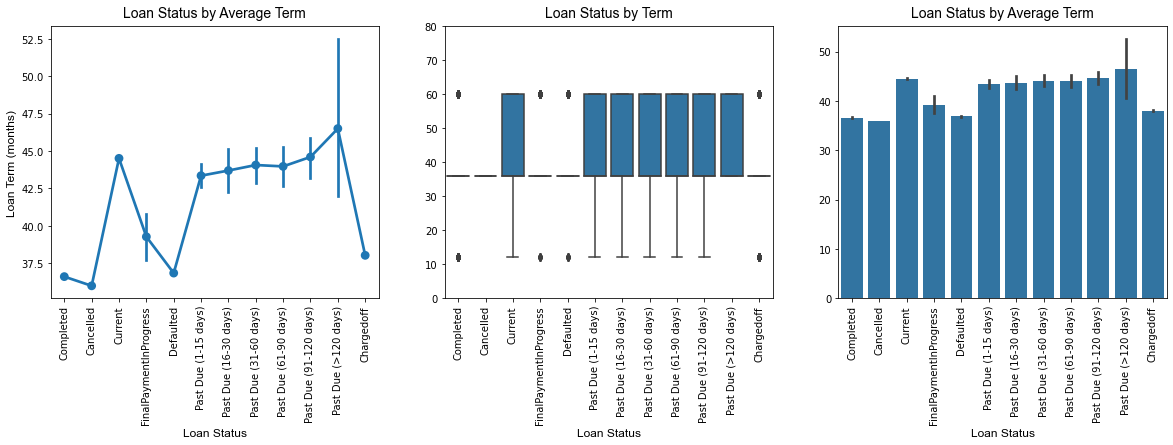

In [205]:
plt.figure(figsize=[20,5])
plt.subplot(1, 3, 1)
sb.pointplot(data=df, x='LoanStatus', y='Term', inner = None, join = True,
              color = color)
plt.xticks(rotation = 90); # include label rotation due to small subplot size
plotter('Loan Status by Average Term', 'Loan Term (months)', 'Loan Status');

# center plot: box plot
plt.subplot(1, 3, 2)
sb.boxplot(data=df, x='LoanStatus', y='Term', color = color)
plt.ylim(0,80)
plt.xticks(rotation = 90)

plotter('Loan Status by Term', '', 'Loan Status');


# right plot: adapted bar chart
plt.subplot(1, 3, 3)
sb.barplot(data=df, x='LoanStatus', y='Term', color = color)
plt.xticks(rotation = 90)
plotter('Loan Status by Average Term', '', 'Loan Status');


**Observations on Loan Status and Loan Term**
> From the plots, there is an average of Loan term of 36 months and above for all categories of borrowers. People in the current and Past Due categories have an average of over 45 months repayment Term period. On the average, most cancelled loans seem to be of 36 months term. The >120 days past due have the highest average term of 46.5 Term, but show a high variance. From these plots, Completed, Cancelled, Defaulted, FinalPaymentInProgress, and Chargedoff loans have the lowest term of less than 40.

### Exploration of the Loan Status and BorrowerAPR

**Question**
> What is the relationship between the Loan Status column and BorrowerAPR

**Visualizations**


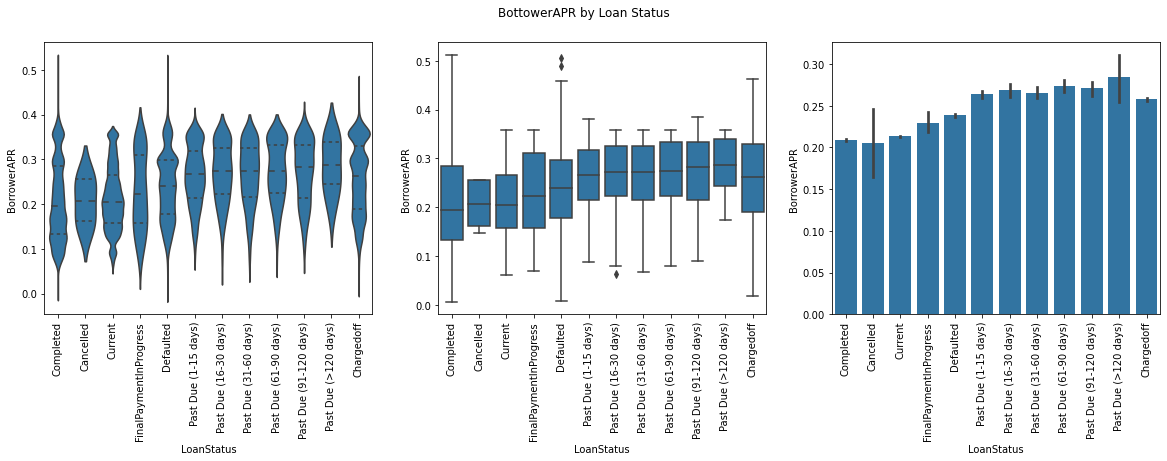

In [206]:
plt.figure(figsize=[20,5])
plt.suptitle('BottowerAPR by Loan Status')
plt.subplot(1, 3, 1)
sb.violinplot(data=df, x='LoanStatus', y='BorrowerAPR', inner = 'quartile',color = color)
plt.xticks(rotation = 90); # include label rotation due to small subplot size

# center plot: box plot
plt.subplot(1, 3, 2)
sb.boxplot(data=df, x='LoanStatus', y='BorrowerAPR', color = color)
plt.xticks(rotation = 90);


# right plot: adapted bar chart
plt.subplot(1, 3, 3)
sb.barplot(data=df, x='LoanStatus', y='BorrowerAPR', color = color)
plt.xticks(rotation = 90);

**Observations on Loan Status and BorrowerAPR**
> From the plots, Completed, Current, Cancelled, and FinalPaymentInProgress LoanStatus have lower mean and median values of BorrowerAPR than the defaulted, PastDue and Chargedoff categories. It is safe to say that borrowers with lower APR are more likely to complete their loan repayment when comparison with the other borrowers.

### Exploration of the Loan Status and Upper Credit Score Range

**Question**
> What is the relationship between the Loan Status column and Upper Credit Score Range

**Visualizations**
Upper Credit Score Range

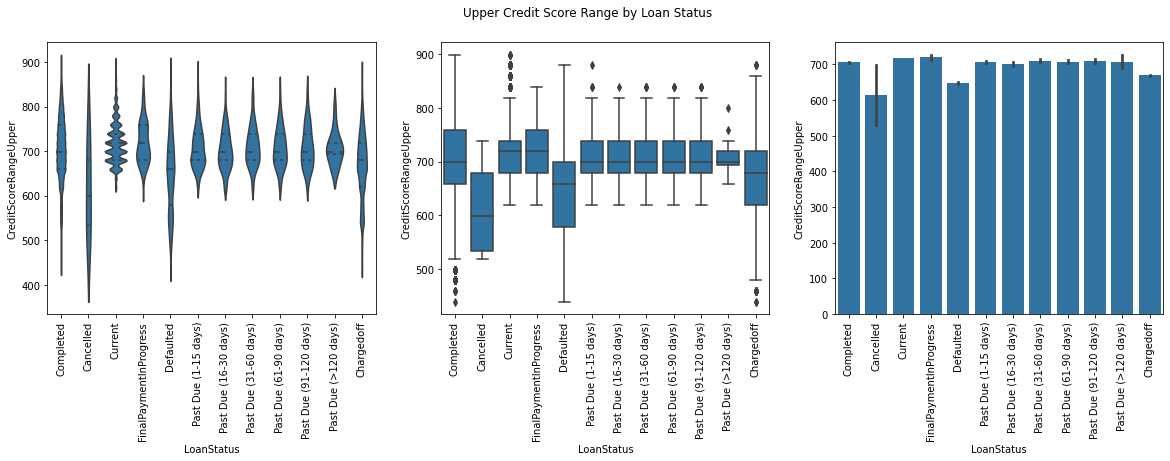

In [207]:

plt.figure(figsize=[20,5])
plt.suptitle('Upper Credit Score Range by Loan Status')
plt.subplot(1, 3, 1)
sb.violinplot(data=df, x='LoanStatus', y='CreditScoreRangeUpper', inner = 'quartile',color = color)
plt.xticks(rotation = 90); # include label rotation due to small subplot size

# center plot: box plot
plt.subplot(1, 3, 2)
sb.boxplot(data=df, x='LoanStatus', y='CreditScoreRangeUpper', color = color)
plt.xticks(rotation = 90);

# right plot: adapted bar chart
plt.subplot(1, 3, 3)
sb.barplot(data=df, x='LoanStatus', y='CreditScoreRangeUpper', color = color)
plt.xticks(rotation = 90);

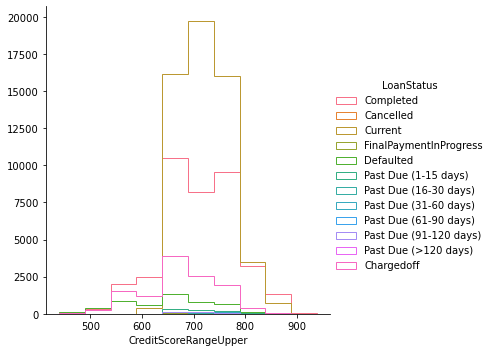

In [208]:
# Plot multiple histogram with Facet grid
bin_edges = np.arange(df['CreditScoreRangeUpper'].min(), df['CreditScoreRangeUpper'].max()+50, 50)
g = sb.FacetGrid(data = df, hue = 'LoanStatus', size = 5)
g.map(plt.hist, "CreditScoreRangeUpper", bins = bin_edges, histtype = 'step')
g.add_legend()

**Observation on LoanStatus by CreditScoreRangeUpper**
> From the plots, Borrowers with Credit score Range Upper of less than 680 are more likely to cancel their Loan. Also, most people with above 800 are more likely to complete their loan repayment.

### Exploration of the Loan Status and Debt to Income Ratio

**Question**
> What is the relationship between the Loan Status column and Debt to income Ratio

**Visualizations**


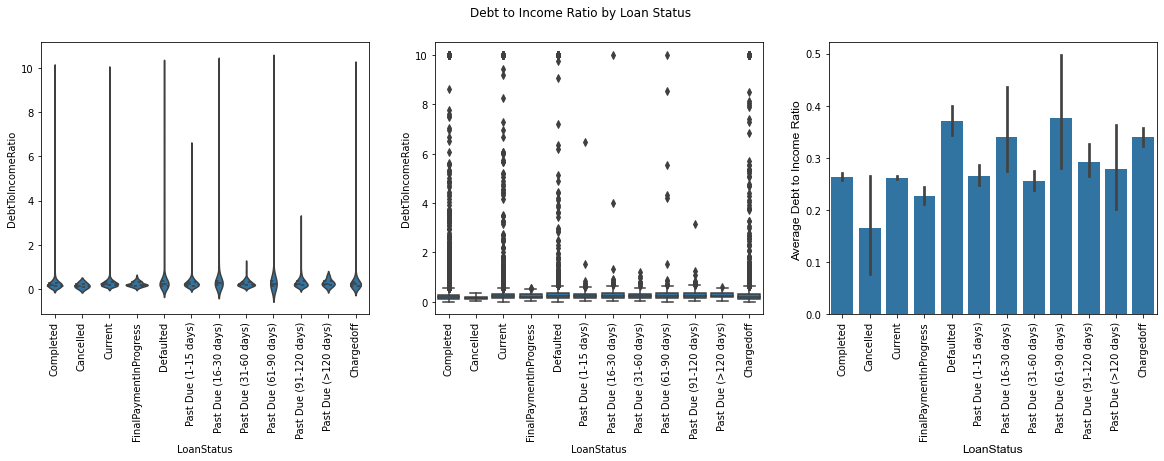

In [209]:
plt.figure(figsize=[20,5])
plt.suptitle('Debt to Income Ratio by Loan Status')
plt.subplot(1, 3, 1)
sb.violinplot(data=df, x='LoanStatus', y='DebtToIncomeRatio', inner = 'quartile',color = color)
plt.xticks(rotation = 90); # include label rotation due to small subplot size

# center plot: box plot
plt.subplot(1, 3, 2)
sb.boxplot(data=df, x='LoanStatus', y='DebtToIncomeRatio', color = color)
plt.xticks(rotation = 90);

# right plot: adapted bar chart
plt.subplot(1, 3, 3)

sb.barplot(data=df, x='LoanStatus', y='DebtToIncomeRatio', color = color)
plt.xticks(rotation = 90);
plotter('', 'Average Debt to Income Ratio ', 'LoanStatus')

**Observation on DebtToIncomeRatio**
> From the plots, on the average, DebtToIncomeRatio is highest in Defaulted, 61-90 days Past Due and Charged off categories of borrowers. The DebtToIncomeRatio is lowest for canceled DebtToIncomeRatio categories.

### Exploration of the Loan Status and Available Bank Credit

**Question**
> What is the relationship between the Loan Status column and Available Bank Credit

**Visualizations**


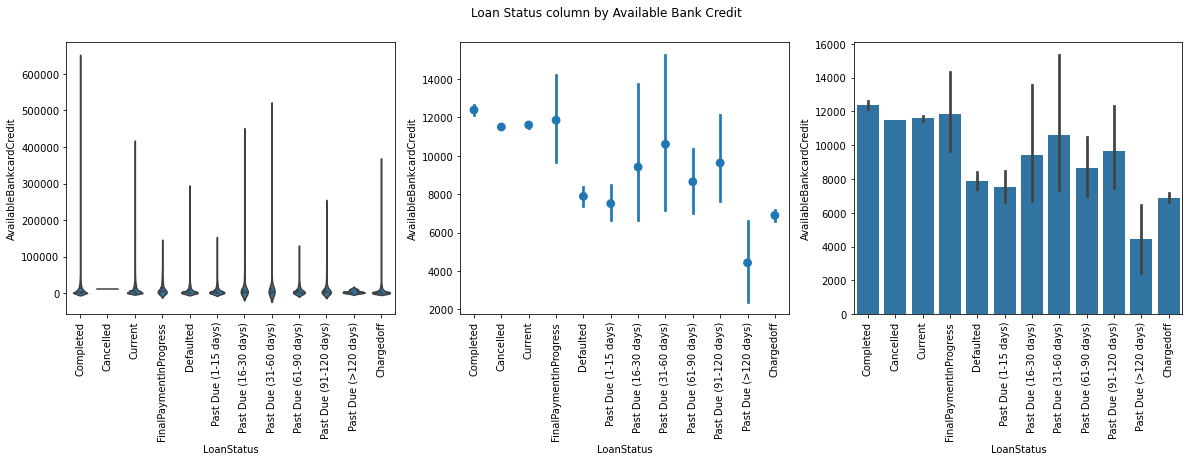

In [210]:
plt.figure(figsize=[20,5])
plt.suptitle('Loan Status column by Available Bank Credit')
plt.subplot(1, 3, 1)
sb.violinplot(data=df, x='LoanStatus', y='AvailableBankcardCredit', inner = 'quartile',color = color)
plt.xticks(rotation = 90); # include label rotation due to small subplot size

# center plot: box plot
plt.subplot(1, 3, 2)
sb.pointplot(data=df, x='LoanStatus', y='AvailableBankcardCredit', color = color, join = False)
plt.xticks(rotation = 90);

# right plot: adapted bar chart
plt.subplot(1, 3, 3)
sb.barplot(data=df, x='LoanStatus', y='AvailableBankcardCredit', color = color)
plt.xticks(rotation = 90);

**Observation on AvailableBankcardCredit by LoanStatus**
> Available Bank Card Credit is higher in borrowers that fall in the completed, cancelled, current and FinalPaymentinprogress categories. Defaulted, Past Due and Charged off categories have lower available Bank Credit. The lowest AvailableBankCredit is noticed in borrowers whose loans are >120 days past due.

### Exploration of the Debt to income ratio and Available Bank Credit

**Question**
> What is the relationship between the Debt to income ratio column and Available Bank Credit column

**Visualizations**

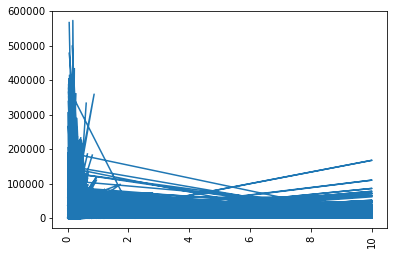

In [211]:
plt.errorbar(data=df, x='DebtToIncomeRatio', y='AvailableBankcardCredit',color = color)
plt.xticks(rotation = 90); 

> The above chart return meaningless lines of data therefore we take a number of steps

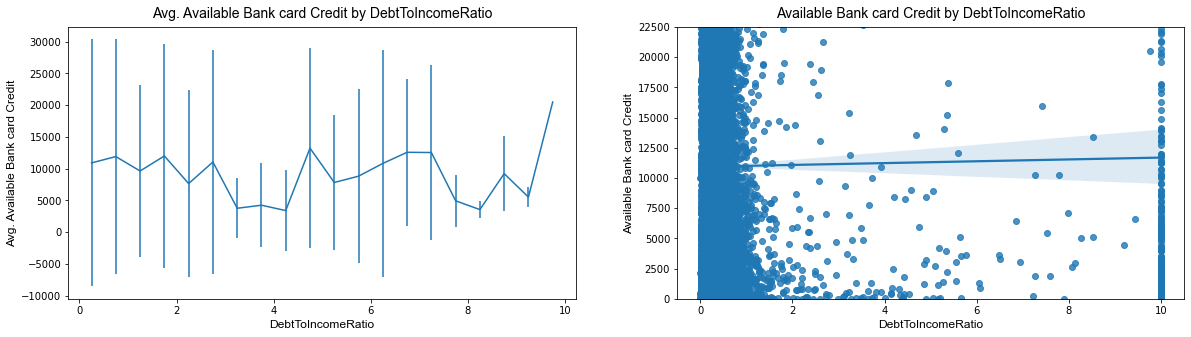

In [224]:
# Set a number of bins into which the data will be grouped.
# Set bin edges, and compute center of each bin 
bin_edges = np.arange(0, 10+0.5, 0.5)
bin_centers = bin_edges[:-1] + 0.25

# Cut the bin values into discrete intervals. Returns a Series object.
displ_binned = pd.cut(df['DebtToIncomeRatio'], bin_edges, include_lowest = True)

# For the points in each bin, we compute the mean and standard error of the mean.
credit_mean = df['AvailableBankcardCredit'].groupby(displ_binned).mean()
credit_std = df['AvailableBankcardCredit'].groupby(displ_binned).std()

#First plot - Plot the summarized data
plt.figure(figsize = [20,5])
plt.subplot(1,2,1)
plt.errorbar(x=bin_centers, y=credit_mean, yerr=credit_std)
plotter('Avg. Available Bank card Credit by DebtToIncomeRatio','Avg. Available Bank card Credit', 'DebtToIncomeRatio');

#second plot - plot the data points
plt.subplot(1,2,2)
plt.ylim(0,22500)
sb.regplot(data=df, x='DebtToIncomeRatio', y='AvailableBankcardCredit')
plotter('Available Bank card Credit by DebtToIncomeRatio','Available Bank card Credit', 'DebtToIncomeRatio');



In [213]:
# to View the correlation coefficient
df['DebtToIncomeRatio'].corr(df.AvailableBankcardCredit)

0.0020585481817927327

**Observation on DebttoIncomeRatio and AvailableBankcardCredit**
> These plots show that there is no correlation relationship between the DebttoIncomeRatio and the AvailableBankcardCredit columns. A large percentage of the borrowers have below 2 DebttoIncomeRatio.

### Exploration of the CreditScoreRangeUpper and BorrowerAPR

**Question**
> What is the relationship between the CreditScoreRangeUpper and BorrowerAPR columns

**Visualizations**

-0.45649524149961024


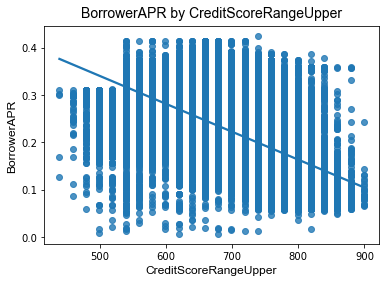

In [225]:
print(df['CreditScoreRangeUpper'].corr(df['BorrowerAPR']))
sb.regplot(data=df, x='CreditScoreRangeUpper', y='BorrowerAPR')
plotter('BorrowerAPR by CreditScoreRangeUpper','BorrowerAPR','CreditScoreRangeUpper')

**Observation on CreditScoreRangeUpper and BorrowerAPR**
There is a negative correlation relationship between the CreditScoreRangeUpper and the BorrowerAPR. From the regression line shown in the plot,  higher CreditScoreRangeUpper tend to have lower borrowerAPR. 

### Exploration of the AvailableBankcardCredit and BorrowerAPR

**Question**
> What is the relationship between the AvailableBankcardCredit and BorrowerAPR columns

**Visualizations**

-0.3489318957493348


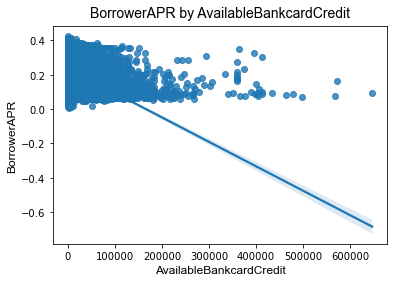

In [226]:
print(df['AvailableBankcardCredit'].corr(df['BorrowerAPR']))
sb.regplot(data=df, x='AvailableBankcardCredit', y='BorrowerAPR')
plotter('BorrowerAPR by AvailableBankcardCredit','BorrowerAPR','AvailableBankcardCredit')

**Observation BorrowerAPR by AvailableBankcardCredit**
There is a negative correlation relationship between the AvailableBankcardCredit and the BorrowerAPR. From the regression line shown in the plot,  higher AvailableBankcardCredit tend to have lower borrowerAPR. 


### Relationships observed
**Observations on Loan Status and Loan Term**
> From the plots, there is an average of Loan term of 36 months and above for all categories of borrowers. People in the current and Past Due categories have an average of over 45 months repayment Term period. On the average, most cancelled loans seem to be of 36 months term. The >120 days past due have the highest average term of 46.5 Term, but show a high variance. From these plots, Completed, Cancelled, Defaulted, FinalPaymentInProgress, and Chargedoff loans have the lowest term of less than 40.

**Observations on Loan Status and BorrowerAPR**
> From the plots, Completed, Current, Cancelled, and FinalPaymentInProgress LoanStatus have lower mean and median values of BorrowerAPR than the defaulted, PastDue and Chargedoff categories. It is safe to say that borrowers with lower APR are more likely to complete their loan repayment when comparison with the other borrowers.

**Observation on LoanStatus by CreditScoreRangeUpper**
> From the plots, Borrowers with Credit score Range Upper of less than 680 are more likely to cancel their Loan. Also, most people with above 800 are more likely to complete their loan repayment.

**Observation on LoanStatus by DebtToIncomeRatio**
> From the plots, on the average, DebtToIncomeRatio is highest in Defaulted, 61-90 days Past Due and Charged off categories of borrowers. The DebtToIncomeRatio is lowest for canceled DebtToIncomeRatio categories.

**Observation on AvailableBankcardCredit by LoanStatus**
> Available Bank Card Credit is higher in borrowers that fall in the completed, cancelled, current and FinalPaymentinprogress categories. Defaulted, Past Due and Charged off categories have lower available Bank Credit. The lowest AvailableBankCredit is noticed in borrowers whose loans are >120 days past due.

**Observation on DebttoIncomeRatio and AvailableBankcardCredit**
> These plots show that there is no correlation relationship between the DebttoIncomeRatio and the AvailableBankcardCredit columns.

### Interesting relationships between features

**Observation on CreditScoreRangeUpper and BorrowerAPR**
> There is a negative correlation relationship between the CreditScoreRangeUpper and the BorrowerAPR. From the regression line shown in the plot,  higher CreditScoreRangeUpper tend to have lower borrowerAPR. 

**Observation on BorrowerAPR by AvailableBankcardCredit**
> There is a negative correlation relationship between the AvailableBankcardCredit and the BorrowerAPR. From the regression line shown in the plot,  higher AvailableBankcardCredit tend to have lower borrowerAPR. 


## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

### Exploration of the Loan Status, Loan Term and BorrowerAPR

**Question**
> What is the relationship between the Loan Status, Loan Term and BorrowerAPR

**Visualizations**


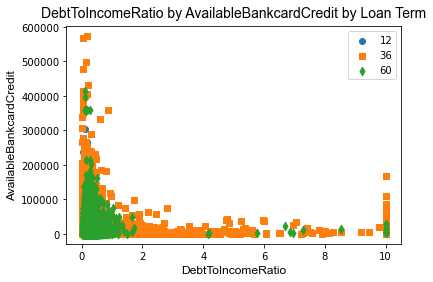

In [216]:
cat_markers = [[12, 'o'],
               [36, 's'],
               [60, 'd']]

for cat, marker in cat_markers:
    df_cat = df[df['Term'] == cat]
    plt.scatter(data = df_cat, x = 'DebtToIncomeRatio', y = 'AvailableBankcardCredit', marker = marker)
    
plt.legend([12,36,60])
plotter("DebtToIncomeRatio by AvailableBankcardCredit by Loan Term", "AvailableBankcardCredit","DebtToIncomeRatio")

**Observation on DebtToIncomeRatio by AvailableBankcardCredit by Loan Term**
> Form the "DebtToIncomeRatio by AvailableBankcardCredit by Loan Term" plot, the spread of the data points of borrowers on the 36 Term indicates that some Borrowers with lower Debt to income ratio have high available bank card credit, while borrowers with high debt to income ratio have lower available bank card credit.

### Exploration of columns to answer question "What factor affects a Loan Outcome Status?"

**Question**
> What factor affects a Loan Outcome Status

**Visualizations**


<Figure size 1440x1440 with 0 Axes>

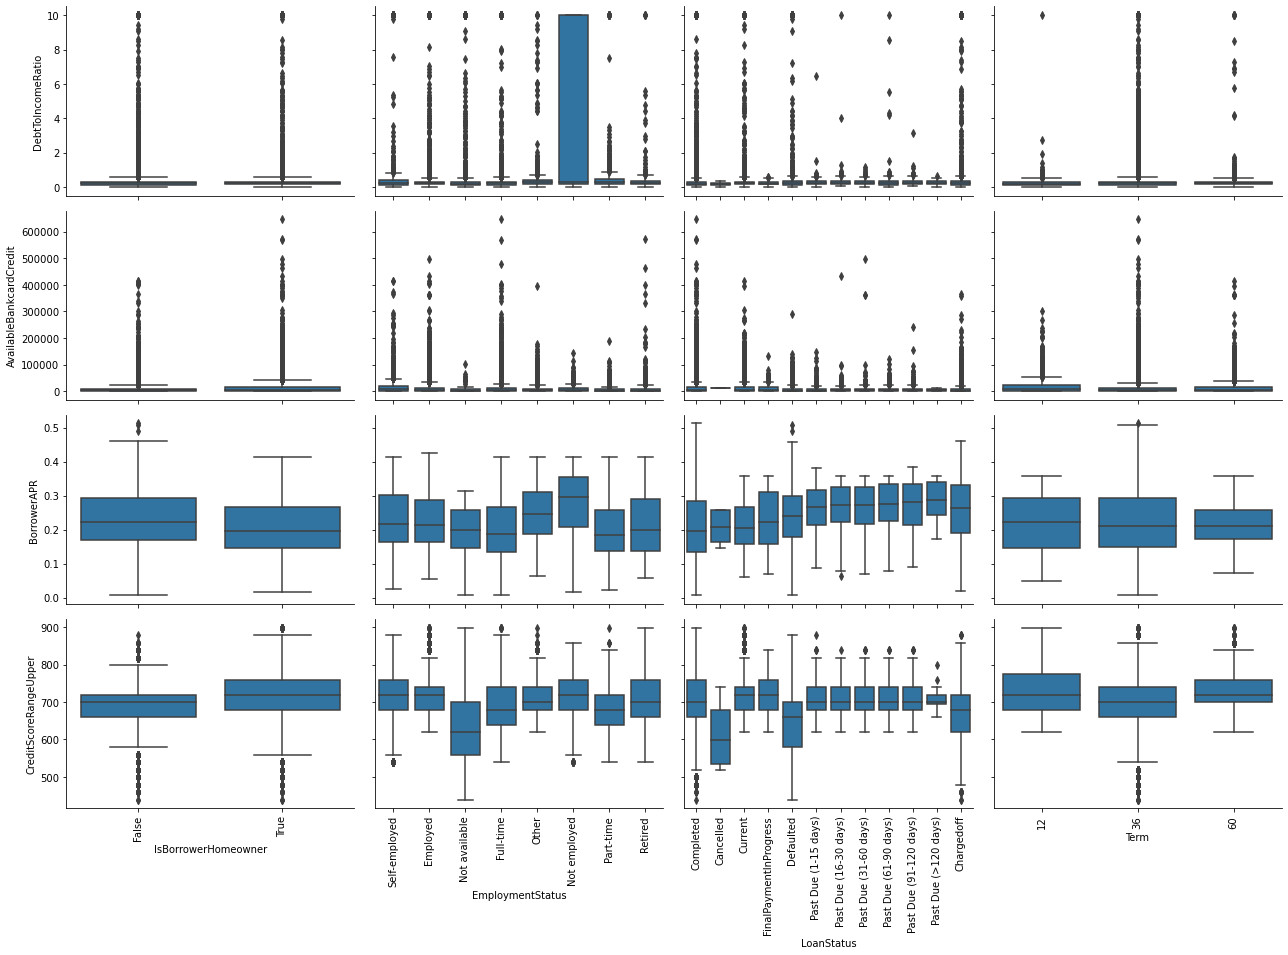

In [217]:
# We find a way to view the numerical data differently

def boxgrid(x, y, **kwargs):
    """ Creating box plots with seaborn's PairGrid. """
    default_color = sb.color_palette()[0]
    sb.boxplot(x, y, color = default_color)
    plt.xticks(rotation = 90)

plt.figure(figsize = [20, 20])
g = sb.PairGrid(data = df, y_vars = ['DebtToIncomeRatio', 'AvailableBankcardCredit', "BorrowerAPR", "CreditScoreRangeUpper" ], x_vars = ['IsBorrowerHomeowner','EmploymentStatus', 'LoanStatus', 'Term'],
                height = 3, aspect = 1.5)
g.map(boxgrid)

plt.show();

**Observation on What factor affects a Loan Outcome Status**
> **DebtToIncomeRatio** is notably high in Borowers that fall in the Not Employed category in **Employment status** column. Consequently, and from previous exploration, high average DebtToIncomeRatio is noticed in LoanStatus outcome categories as Defaulted, PastDue and Chargedoff. 
> The Not Employed category of the Employment Status column have the highest BorrowerAPR. 

### Exploration of the columns to answer the question - What affects the borrower’s APR or interest rate?

**Question**
> What affects the borrower’s APR or interest rate?

**Visualizations**

<Figure size 1440x1440 with 0 Axes>

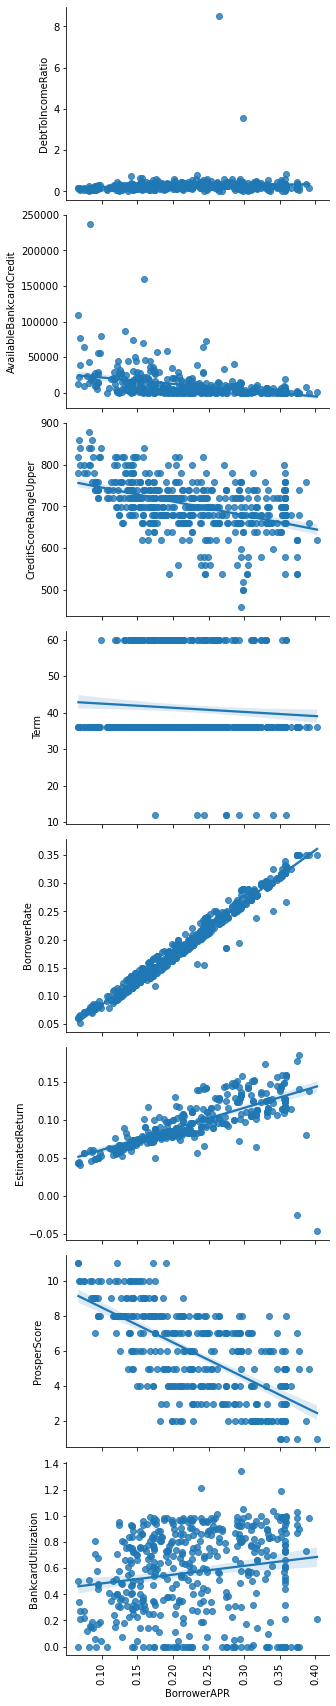

In [218]:

# To answer the question What affects the borrower’s APR or interest rate?

# We draw samples from data set to view data differently
samples = np.random.choice(df.shape[0], 500, replace = False)
try:
    Loan_samp = df.loc[samples,:]
except KeyError:
    pass

def boxgrid(x, y, **kwargs):
    """ Creating box plots with seaborn's PairGrid. """
    default_color = sb.color_palette()[0]
    sb.regplot(x, y, color = default_color)
    plt.xticks(rotation = 90)

plt.figure(figsize = [20, 20])
g = sb.PairGrid(data = Loan_samp, y_vars = ['DebtToIncomeRatio', 'AvailableBankcardCredit', "CreditScoreRangeUpper", 'Term',
        'BorrowerRate', 'EstimatedReturn', 'ProsperScore', 'BankcardUtilization'], x_vars = ["BorrowerAPR"], height = 3, aspect = 1.5)
g.map(boxgrid)

plt.show();

**Observation on What affects the borrower’s APR or interest rate**
> The BorrowerAPR is positively correlated with EstimatedReturn, BorrowerRate and BankCardUtilization. BorrowerAPR is also negatively correlated with ProsperScore and a little negatively correlated with AvailableBankcardCredit and CreditRangeScoreUpper.

> In other words, the higher the EstimatedReturn, BorrowerRate, and BankCardUtilization, the more the BorrowerAPR, and the lower the ProsperScore, AvailableBankcardCredit, and CreditRangeScoreUpper the more the borrowerAPR.

### Exploration of the columns to answer the question - How does Loan Term affect Loan Status?

**Question**
> How does Loan Term affect Loan Status?

**Visualizations**


In [237]:
df.groupby(['Term'])['LoanStatus'].value_counts(normalize=True).reset_index()[:5]


,Term,level_1,LoanStatus
0,12,Completed,0.898389
1,12,Chargedoff,0.044610
2,12,Current,0.038414
3,12,FinalPaymentInProgress,0.006196
4,12,Defaulted,0.006196


<Figure size 1440x360 with 0 Axes>

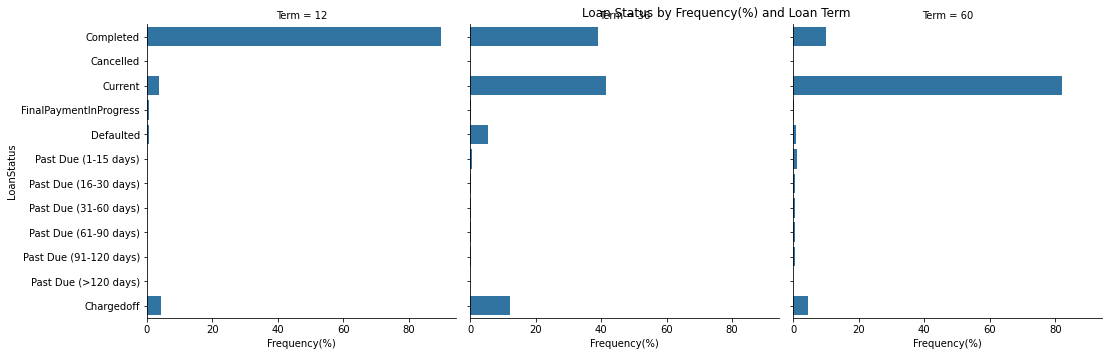

In [236]:
plt.figure(figsize = [20,5])

df_Term_Status = df.groupby(['Term'])['LoanStatus'].value_counts(normalize=True).reset_index().rename({'level_1':'LoanStatus', 'LoanStatus':'Frequency(%)'},axis = 1)
df_Term_Status['Frequency(%)'] = df_Term_Status['Frequency(%)']*100

g = sb.FacetGrid(df_Term_Status, col="Term", col_wrap=4, height=5)
ax2 = g.map(sb.barplot, "Frequency(%)", "LoanStatus")
plt.suptitle("Loan Status by Frequency(%) and Loan Term");
plt.show()





**Observation on Loan Status by Frequency(%) and Loan Term**
> From the Loan Status by Frequency(%) and Loan Term plots, the highest frequency of completion in Loan repayment is noted in the 12 months Term, followed by the 36 months and the 60 months term.

### Exploration of the columns to answer the question - How does CreditScoreRangeUpper affect Loan Status?

**Question**
> How does CreditScoreRangeUpper affect Loan Status?

**Visualizations**


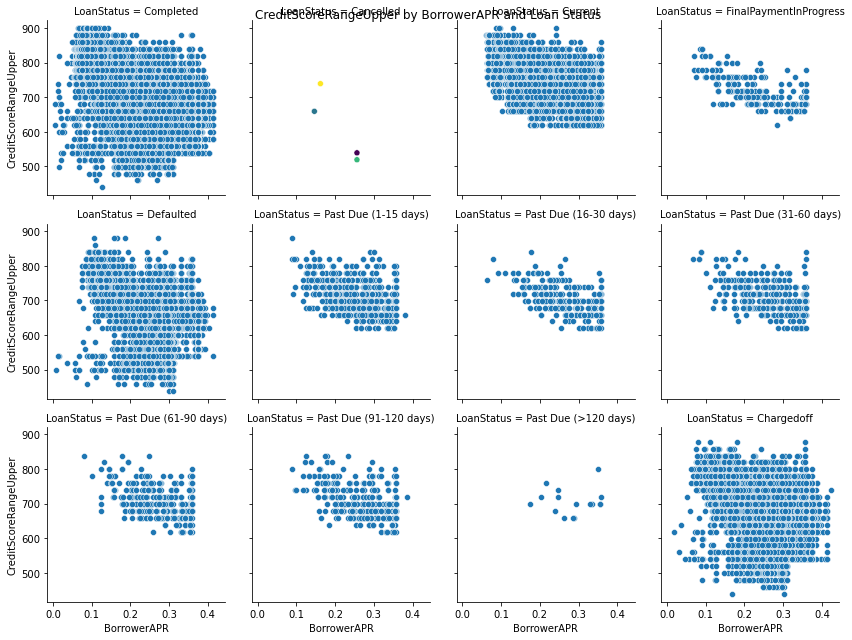

In [235]:

g = sb.FacetGrid(df, col="LoanStatus", col_wrap=4)
g.map(sb.scatterplot, "BorrowerAPR", "CreditScoreRangeUpper")
g.fig.suptitle("CreditScoreRangeUpper by BorrowerAPR and Loan Status");

**Observation on CreditScoreRangeUpper by BorrowerAPR and Loan Status**
> There is a wide spread of the data points in Borrowers in the completed, Defaulted and Chargedoff Loan Status categories, having between 0% and 43% APR and 440 to 900 CreditScoreRangeUpper value. All the Past Due categories of borrowers have between 8% and 36% Borrower APR and between 600 and 850 CreditScoreRangeUpper value.

### Exploration of the columns to answer the question - How does BorrowerAPR and Loan Term affect Loan Status?

**Question**
> How does BorrowerAPR and Loan Term affect Loan Status?

**Visualizations**


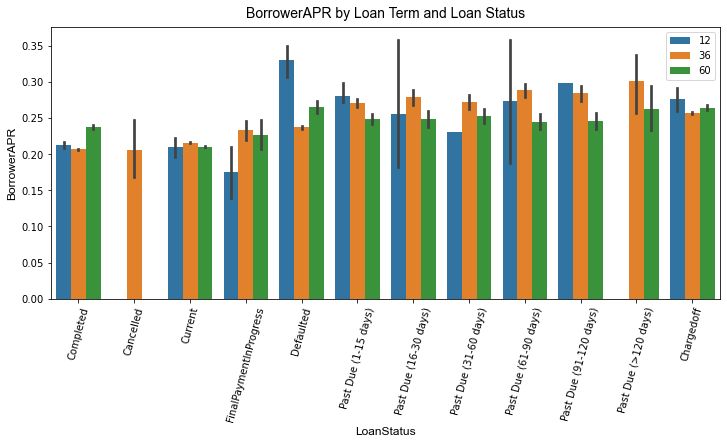

In [227]:
plt.figure(figsize = (12,5))
ax = sb.barplot(data = df, x = 'LoanStatus', y = 'BorrowerAPR', hue = 'Term')
ax.legend(loc = 8, ncol = 3, framealpha = 1, title = 'Term')
plt.xticks(rotation = 75)
plt.legend()
plotter("BorrowerAPR by Loan Term and Loan Status", "BorrowerAPR","LoanStatus")



**Observation on BorrowerAPR by Loan Term and Loan Status**

> From this plot, BorrowerAPR is highest in borrowers with defaulted loan status that had 12 month loan term. BorrowerAPR is lowest in borrowers with FinalPaymentinProgress Loan Status and 12 month payment term.
Generally, borrowers in the Defalted, Past Due and Chargedoff Loan status categories have higher Borrower APR.

> From this plot, Borrowers whose BorrowerAPR are greater than 25% are more likely to not pay complete their Loan repayment.

### Relationships observed in the Multivariate investigation. 

**Observation on DebtToIncomeRatio by AvailableBankcardCredit by Loan Term**
> The spread of the data points of borrowers on the 36 Term indicates that some Borrowers with lower Debt to income ratio have high available bank card credit, while borrowers with high debt to income ratio have lower available bank card credit.

**Observation on What factor affects a Loan Outcome Status**
> **DebtToIncomeRatio** - DebtToIncomeRatio is notably high in Borrowers that fall in the Not Employed category in Employment status column. Consequently, and from previous exploration, high average DebtToIncomeRatio is noticed in LoanStatus outcome categories as Defaulted, PastDue and Chargedoff. 
> **BorrowerAPR** - The Not Employed category of the Employment Status column have the highest BorrowerAPR. From previous plot of BorrowerAPR by LoanStatus, It was observed that borrowers with lower APR are more likely to complete their loan repayment when compared with the other borrowers. Thus Not employed category of borrowers are more likely to default on the repayment of their Loan.

**Observation on What affects the borrower’s APR or interest rate**
> The BorrowerAPR is positively correlated with EstimatedReturn, BorrowerRate and BankCardUtilization. BorrowerAPR is also negatively correlated with ProsperScore and a little negatively correlated with AvailableBankcardCredit and CreditRangeScoreUpper.

> In other words, the higher the EstimatedReturn, BorrowerRate, and BankCardUtilization, the more the BorrowerAPR, and the lower the ProsperScore, AvailableBankcardCredit, and CreditRangeScoreUpper the more the borrowerAPR.

**Observation on Loan Status by Frequency(%) and Loan Term**
> From the Loan Status by Frequency(%) and Loan Term plots, the highest frequency of completion in Loan repayment is noted in the 12 months Term, followed by the 36 months and the 60 months term.

**Observation on CreditScoreRangeUpper by BorrowerAPR and Loan Status**
> There is a wide spread of the data points in Borrowers in the completed, Defaulted and Chargedoff Loan Status categories, having between 0% and 43% APR and 440 to 900 CreditScoreRangeUpper value. All the Past Due categories of borrowers have between 8% and 36% Borrower APR and between 600 and 850 CreditScoreRangeUpper value.

**Observation on BorrowerAPR by Loan Term and Loan Status**

> From this plot, BorrowerAPR is highest in borrowers with defaulted loan status that had 12 month loan term. BorrowerAPR is lowest in borrowers with FinalPaymentinProgress Loan Status and 12 month payment term.

> Borrowers in the Defalted, Past Due and Chargedoff Loan status categories have higher Borrower APR.

### Interesting or surprising interactions between features

>  Borrowers whose BorrowerAPR are greater than 25% are more likely to not pay complete their Loan repayment.


## Conclusions
The Prosper Loan Data was explored with the goal of finding insights on Loan Status outcomes. The main feature of interest is the LoanStatus. The unique entries in the LoanStatus columns are: 'Completed', 'Cancelled', 'Current', 'Defaulted', 'Past Due (1-15 days)', 'Past Due (16-30 days)', 'Past Due (31-60 days)', 'Past Due (61-90 days)', 'Past Due (91-120 days)', 'Past Due (>120 days)', 'FinalPaymentInProgress', and 'Chargedoff'. My interest is to find out the variables that are important to predicting LoanStatus.
In finding this relationship, I dropped some features to concentrate on some features of interest. Some features of interest are LoanTerm, BorrowerAPR, CreditScoreRange, DebtToIncomeRatio, AvailableBankcardCredit, etc.

Summarily, the following insights are drawn from this exploration

Factor that affects a Loan Outcome Status are:

> **DebtToIncomeRatio** 
> DebtToIncomeRatio is notably high in Borrowers that fall in the Not Employed category in Employment status column. Consequently, and from previous exploration, high average DebtToIncomeRatio is noticed in LoanStatus outcome categories as Defaulted, PastDue and Chargedoff. 

> **BorrowerAPR** - 
> Borrowers in the Defalted, Past Due and Chargedoff Loan status categories have higher Borrower APR.

> The Not Employed category of the Employment Status column have the highest BorrowerAPR. From previous plot of BorrowerAPR by LoanStatus, It was observed that borrowers with lower APR are more likely to complete their loan repayment when compared with the other borrowers. Thus Not employed category of borrowers are more likely to default on the repayment of their Loan.

> The higher the EstimatedReturn, BorrowerRate, and BankCardUtilization, the more the BorrowerAPR, and the lower the ProsperScore, AvailableBankcardCredit, and CreditRangeScoreUpper the more the BorrowerAPR

> BorrowerAPR is highest in borrowers with defaulted loan status that had 12 month loan term. BorrowerAPR is lowest in borrowers with FinalPaymentinProgress Loan Status and 12 month payment term.

> Borrowers whose BorrowerAPR are greater than 25% are more likely to not pay complete their Loan repayment.

> **DebtToIncomeRatio**

> DebtToIncomeRatio is notably high in Borrowers that fall in the Not Employed category in Employment status column. Consequently, and from previous exploration, high average DebtToIncomeRatio is noticed in LoanStatus outcome categories as Defaulted, PastDue and Chargedoff. 

> Borrowers with lower Debt to income ratio have high available bank card credit, while borrowers with high debt to income ratio have lower available bank card credit.